# **Data**
1. S.No. : Serial Number
2. Name : Name of the car which includes Brand name and Model name
3. Location : The location in which the car is being sold or is available for purchase Citiesr> 4. Year : Manufacturing year of the car
5. Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM.
6. Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
7. Transmission : The type of transmission used by the car. (Automatic / Manual)
8. Owner : Type of ownership
9. Mileage : The standard mileage offered by the car company in kmpl or km/kg
10. Engine : The displacement volume of the engine in CC.
11. Power : The maximum power of the engine in bhp.
12. Seats : The number of seats in the car.
13. New_Price : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)
14. Price : The price of the used car in INR Lakhs (1 Lakh = 100, 000)

# **Import Libraries**

In [279]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import re
from mpl_toolkits.mplot3d import Axes3D
import os 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# **Read the CSV file**

In [280]:
df = pd.read_csv('../content/used_cars_data.csv', delimiter=',')

# **Understanding the used car data**

In [281]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [282]:
df.describe()

,S.No.,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7253.000000,7.253000e+03,7200.000000,6019.000000
mean,3626.000000,2013.365366,5.869906e+04,5.279722,9.479468
std,2093.905084,3.254421,8.442772e+04,0.811660,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3626.000000,2014.000000,5.341600e+04,5.000000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,5.000000,9.950000
max,7252.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


# **Data cleaning**

In [284]:
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

we can see 6247 values are missing in the New_Price column which can significantly impact the model training. Along with that minor data is missing in the columns as mentioned below. Data imputation is future scope for this work. For now we are dropping all the null values and New_Price column.

1.   Price, which is a Target variable 17 % missing values. Since this is the target we need cannot train model with missing value. We will remove this rows.
2.   Seats has only 53 values missing. 
3.   Power and Engine has 46 missing values.
4.   Mileage has two values missing.



In [285]:
df.drop('S.No.',axis=1,inplace=True)

In [286]:
df.drop('New_Price',axis=1,inplace=True)

In [287]:
df.dropna(inplace=True)

In [288]:
df['Mileage'] = df['Mileage'].str.replace(r'([A-Za-z/ ]+)','').astype(float)
df['Engine'] = df['Engine'].str.replace(r'([A-Za-z/ ]+)','').astype(float)
df['Power'] = df['Power'].str.replace(r'([A-Za-z/ ]+)','').astype(float)
df.head()

<ipython-input-288-9c26964360a4>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Mileage'] = df['Mileage'].str.replace(r'([A-Za-z/ ]+)','').astype(float)
<ipython-input-288-9c26964360a4>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Engine'] = df['Engine'].str.replace(r'([A-Za-z/ ]+)','').astype(float)
<ipython-input-288-9c26964360a4>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Power'] = df['Power'].str.replace(r'([A-Za-z/ ]+)','').astype(float)


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [289]:
print(len(df['Name'].unique()))
#print(df['Location'].unique())
#print(df['Fuel_Type'].unique())
#print(df['Transmission'].unique())
#print(df['Owner_Type'].unique())

#print(df['Name'].value_counts())
#print(df['Location'].value_counts())
#print(df['Fuel_Type'].value_counts())
#print(df['Transmission'].value_counts())
#print(df['Owner_Type'].value_counts())


1855


# **Feature extraction**
Deriving age of the car from the year of manufacturing.


In [290]:
df['Current_year']=2022
df['Year']=df['Current_year']-df['Year']
df.drop('Current_year',axis=1,inplace=True)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,12,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,7,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,11,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,10,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,9,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


# **Exploratory Data Analysis**

In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   float64
 8   Engine             5975 non-null   float64
 9   Power              5975 non-null   float64
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 606.8+ KB



Years is left skewed.

Kilometer driven. Max values seems to be 6500000. This is very high and seems to be outlier.

Mileage is almost Normally distrubuited

Engine is right skewed and has outliers on higher and lower end

Power and Price are also right skewed.

Price 160 Lakh is high for a used car. Seems to be an outlier.





<ipython-input-292-c3abb6a514d8>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable],kde=False,color='green')


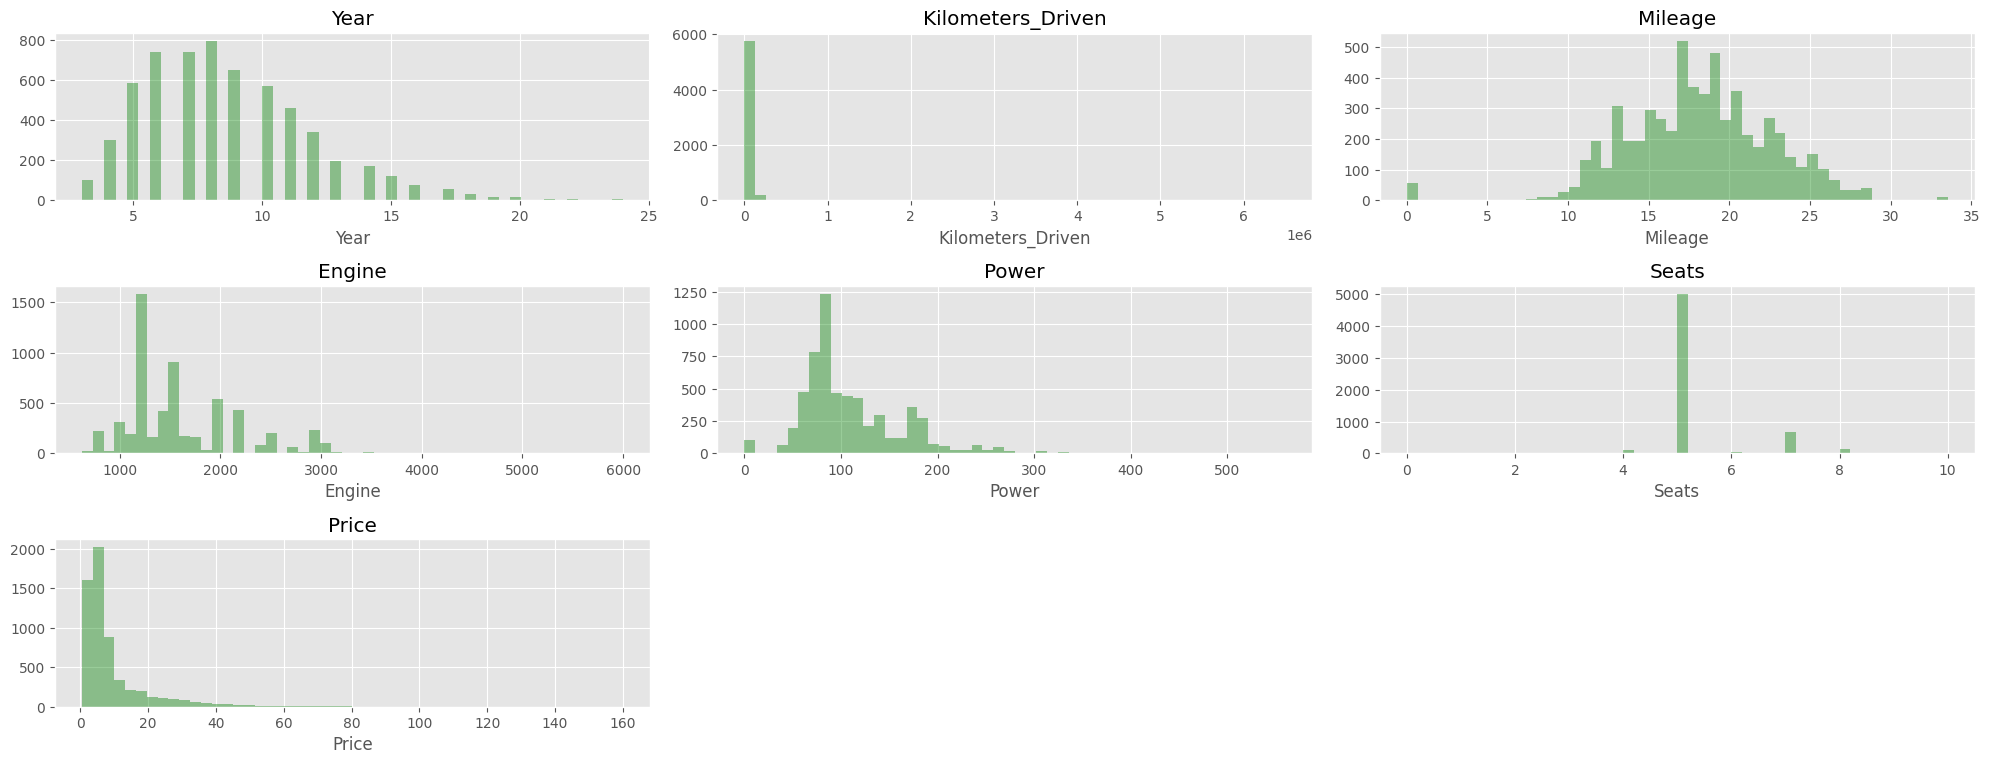

In [292]:
plt.style.use('ggplot')
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,25))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(10,3,i+1)
                       
                     sns.distplot(df[variable],kde=False,color='green')
                     plt.tight_layout()
                     plt.title(variable)

Engine is highly correlated with price and power which makes sence.
Price is highly correlated with engine, power, age of the car
Mileage and age has a correlation which makes sense

<ipython-input-293-0695e59fa221>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


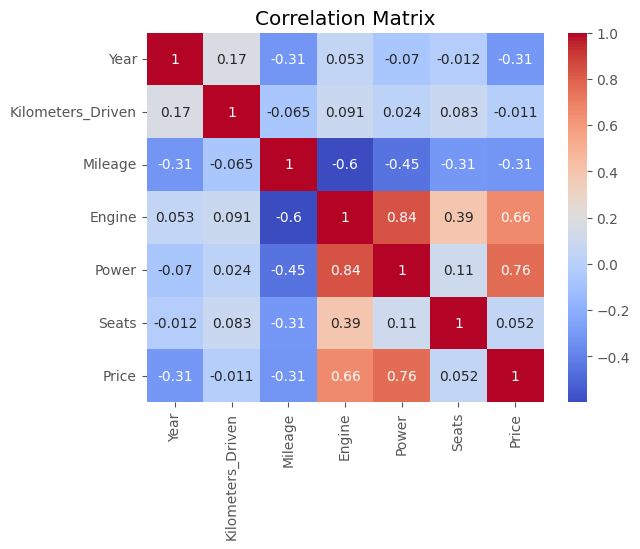

In [293]:
corr = df.corr()

sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()

In [294]:
fuel_type = df['Fuel_Type']
location = df['Location']
owner_type = df['Owner_Type']
transmission_type = df['Transmission']
selling_price = df['Price']

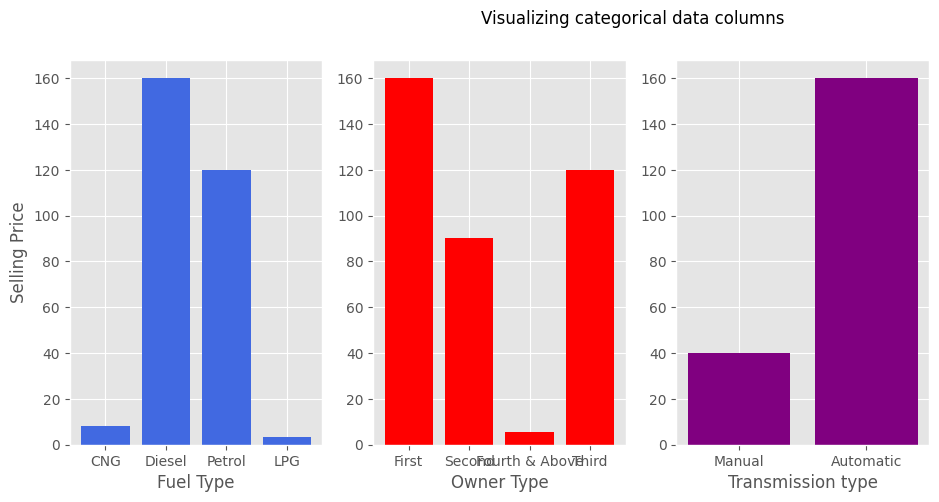

In [295]:
from matplotlib import style

style.use('ggplot')
fig = plt.figure(figsize=(15,5))
fig.suptitle('Visualizing categorical data columns')
plt.subplot(1,4,1)
plt.bar(fuel_type,selling_price, color='royalblue')
plt.xlabel("Fuel Type")
plt.ylabel("Selling Price")
plt.subplot(1,4,2)
plt.bar(owner_type, selling_price, color='red')
plt.xlabel("Owner Type")
plt.subplot(1,4,3)
plt.bar(transmission_type, selling_price, color='purple')
plt.xlabel('Transmission type')
plt.show()

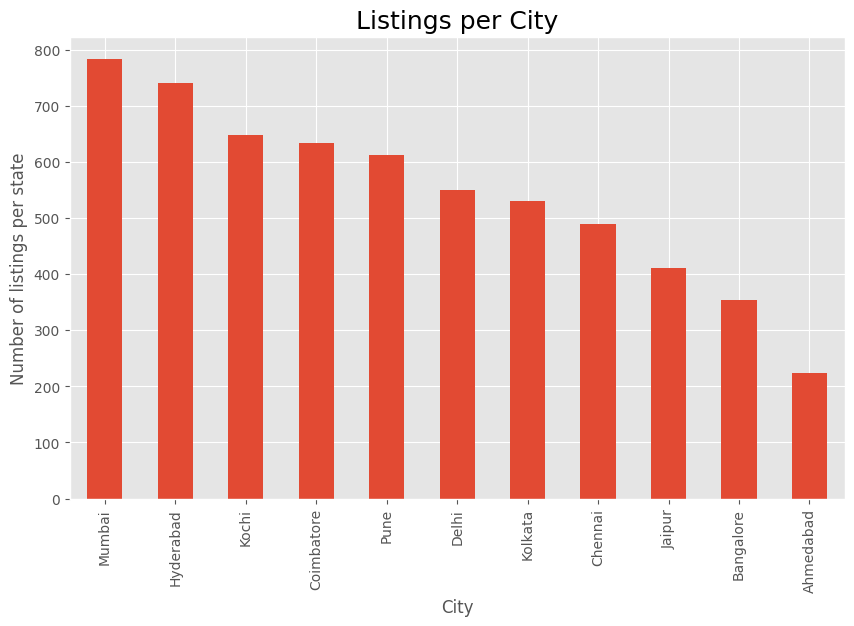

In [296]:
df.groupby(['Location'])['Price'].count().sort_values(ascending=False).plot(kind='bar', figsize=(10,6))
plt.ylabel('Number of listings per state', fontsize=12)
plt.xlabel('City', fontsize=12)
plt.title('Listings per City', fontsize=18)
plt.show()

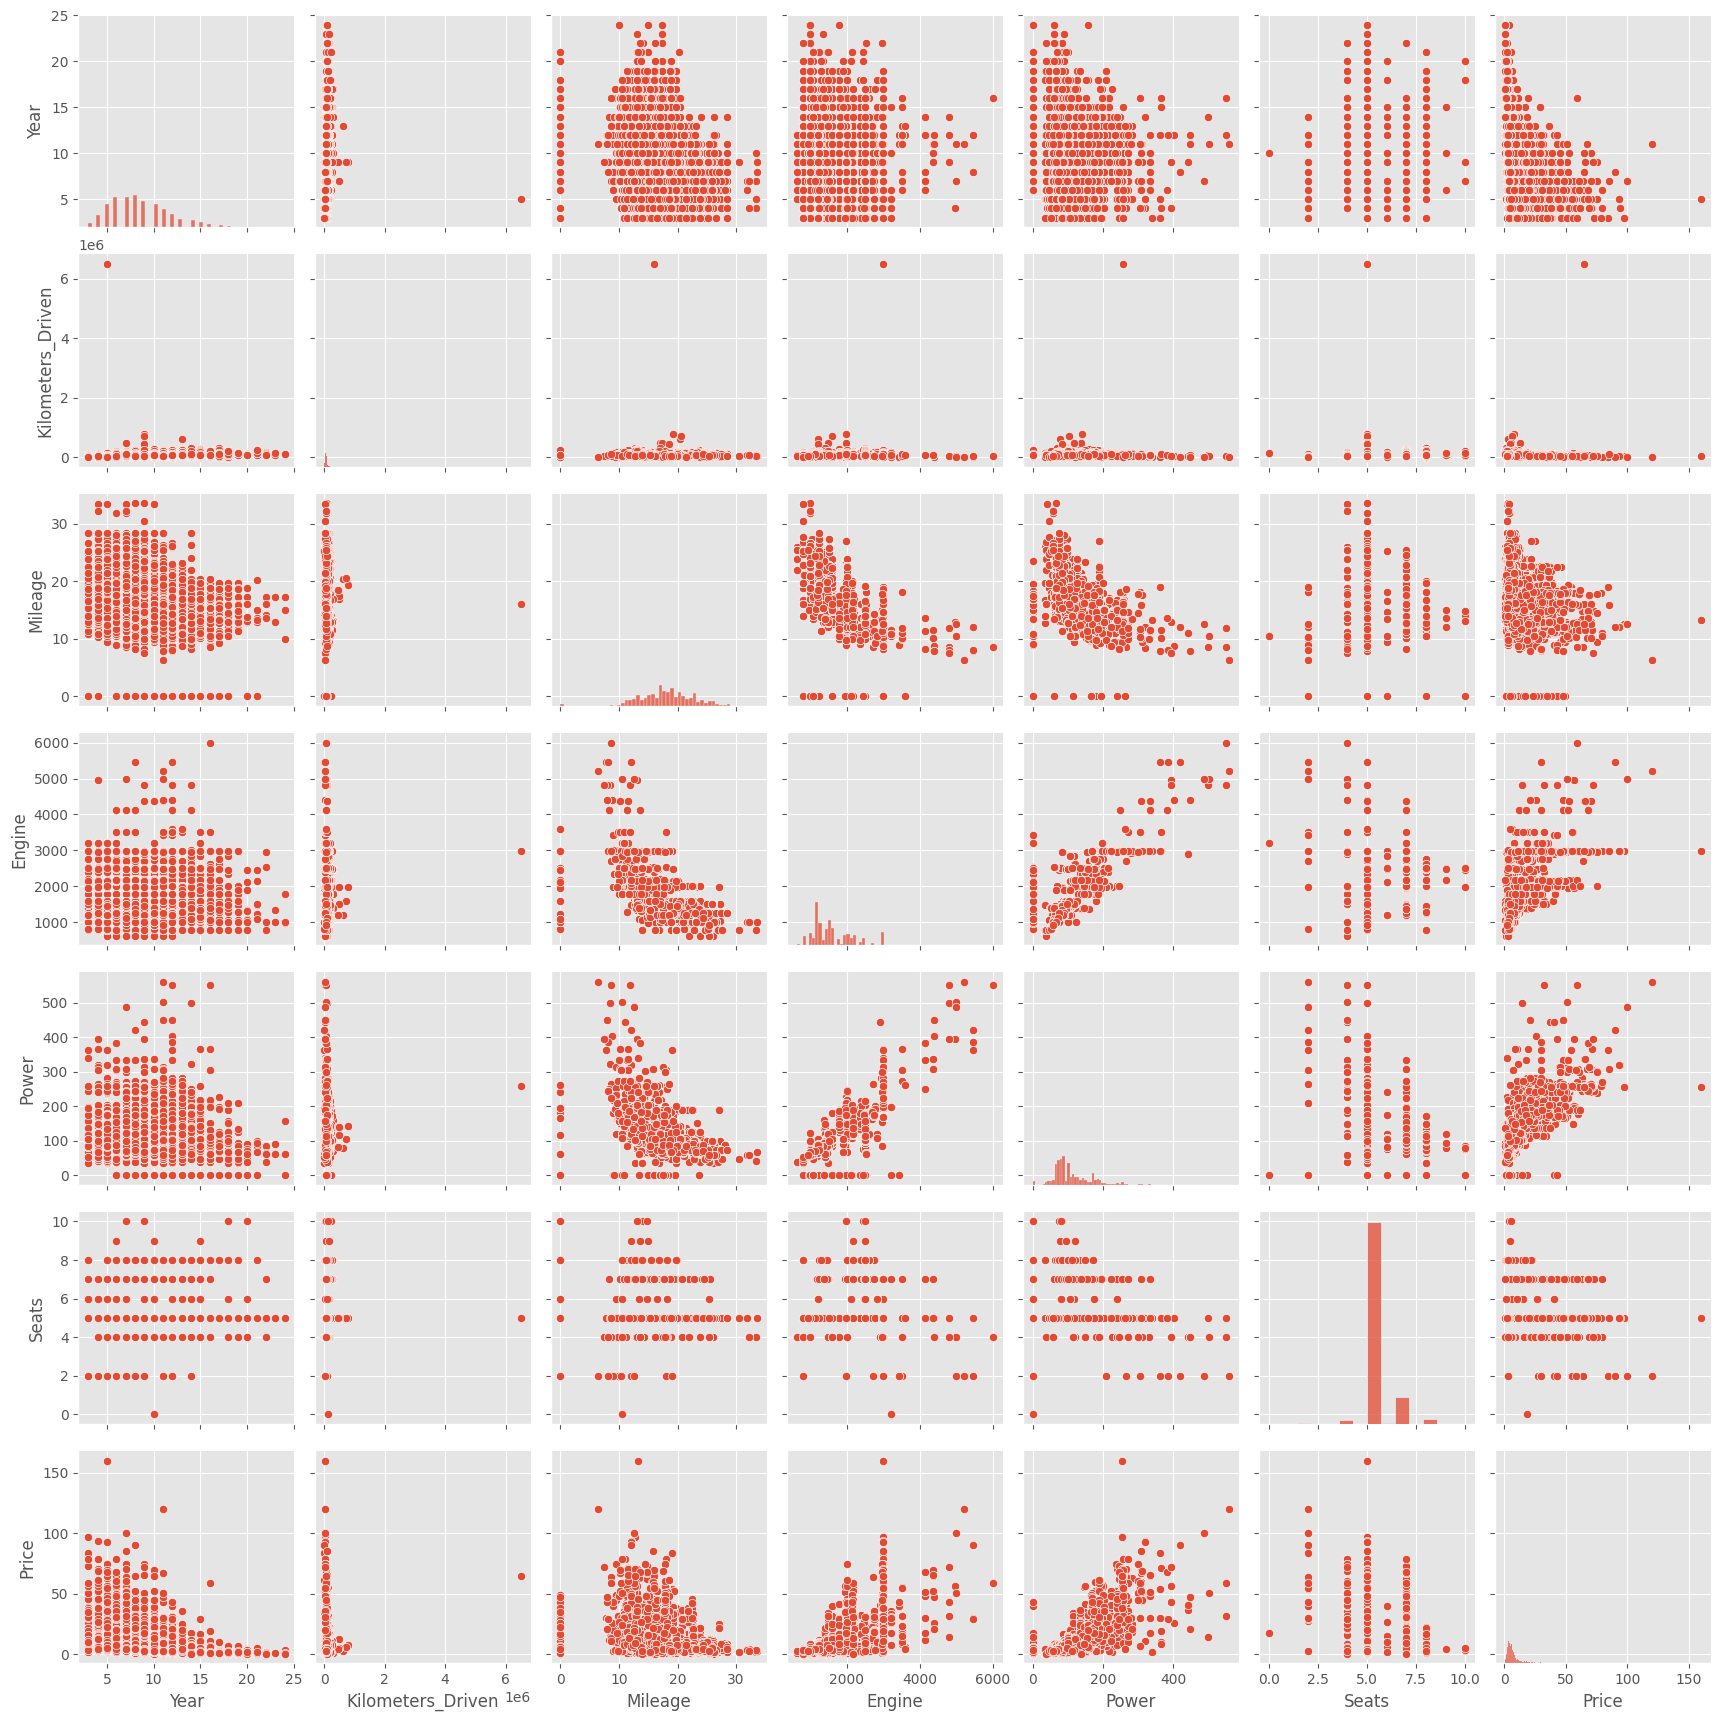

In [297]:
sns.pairplot(df)

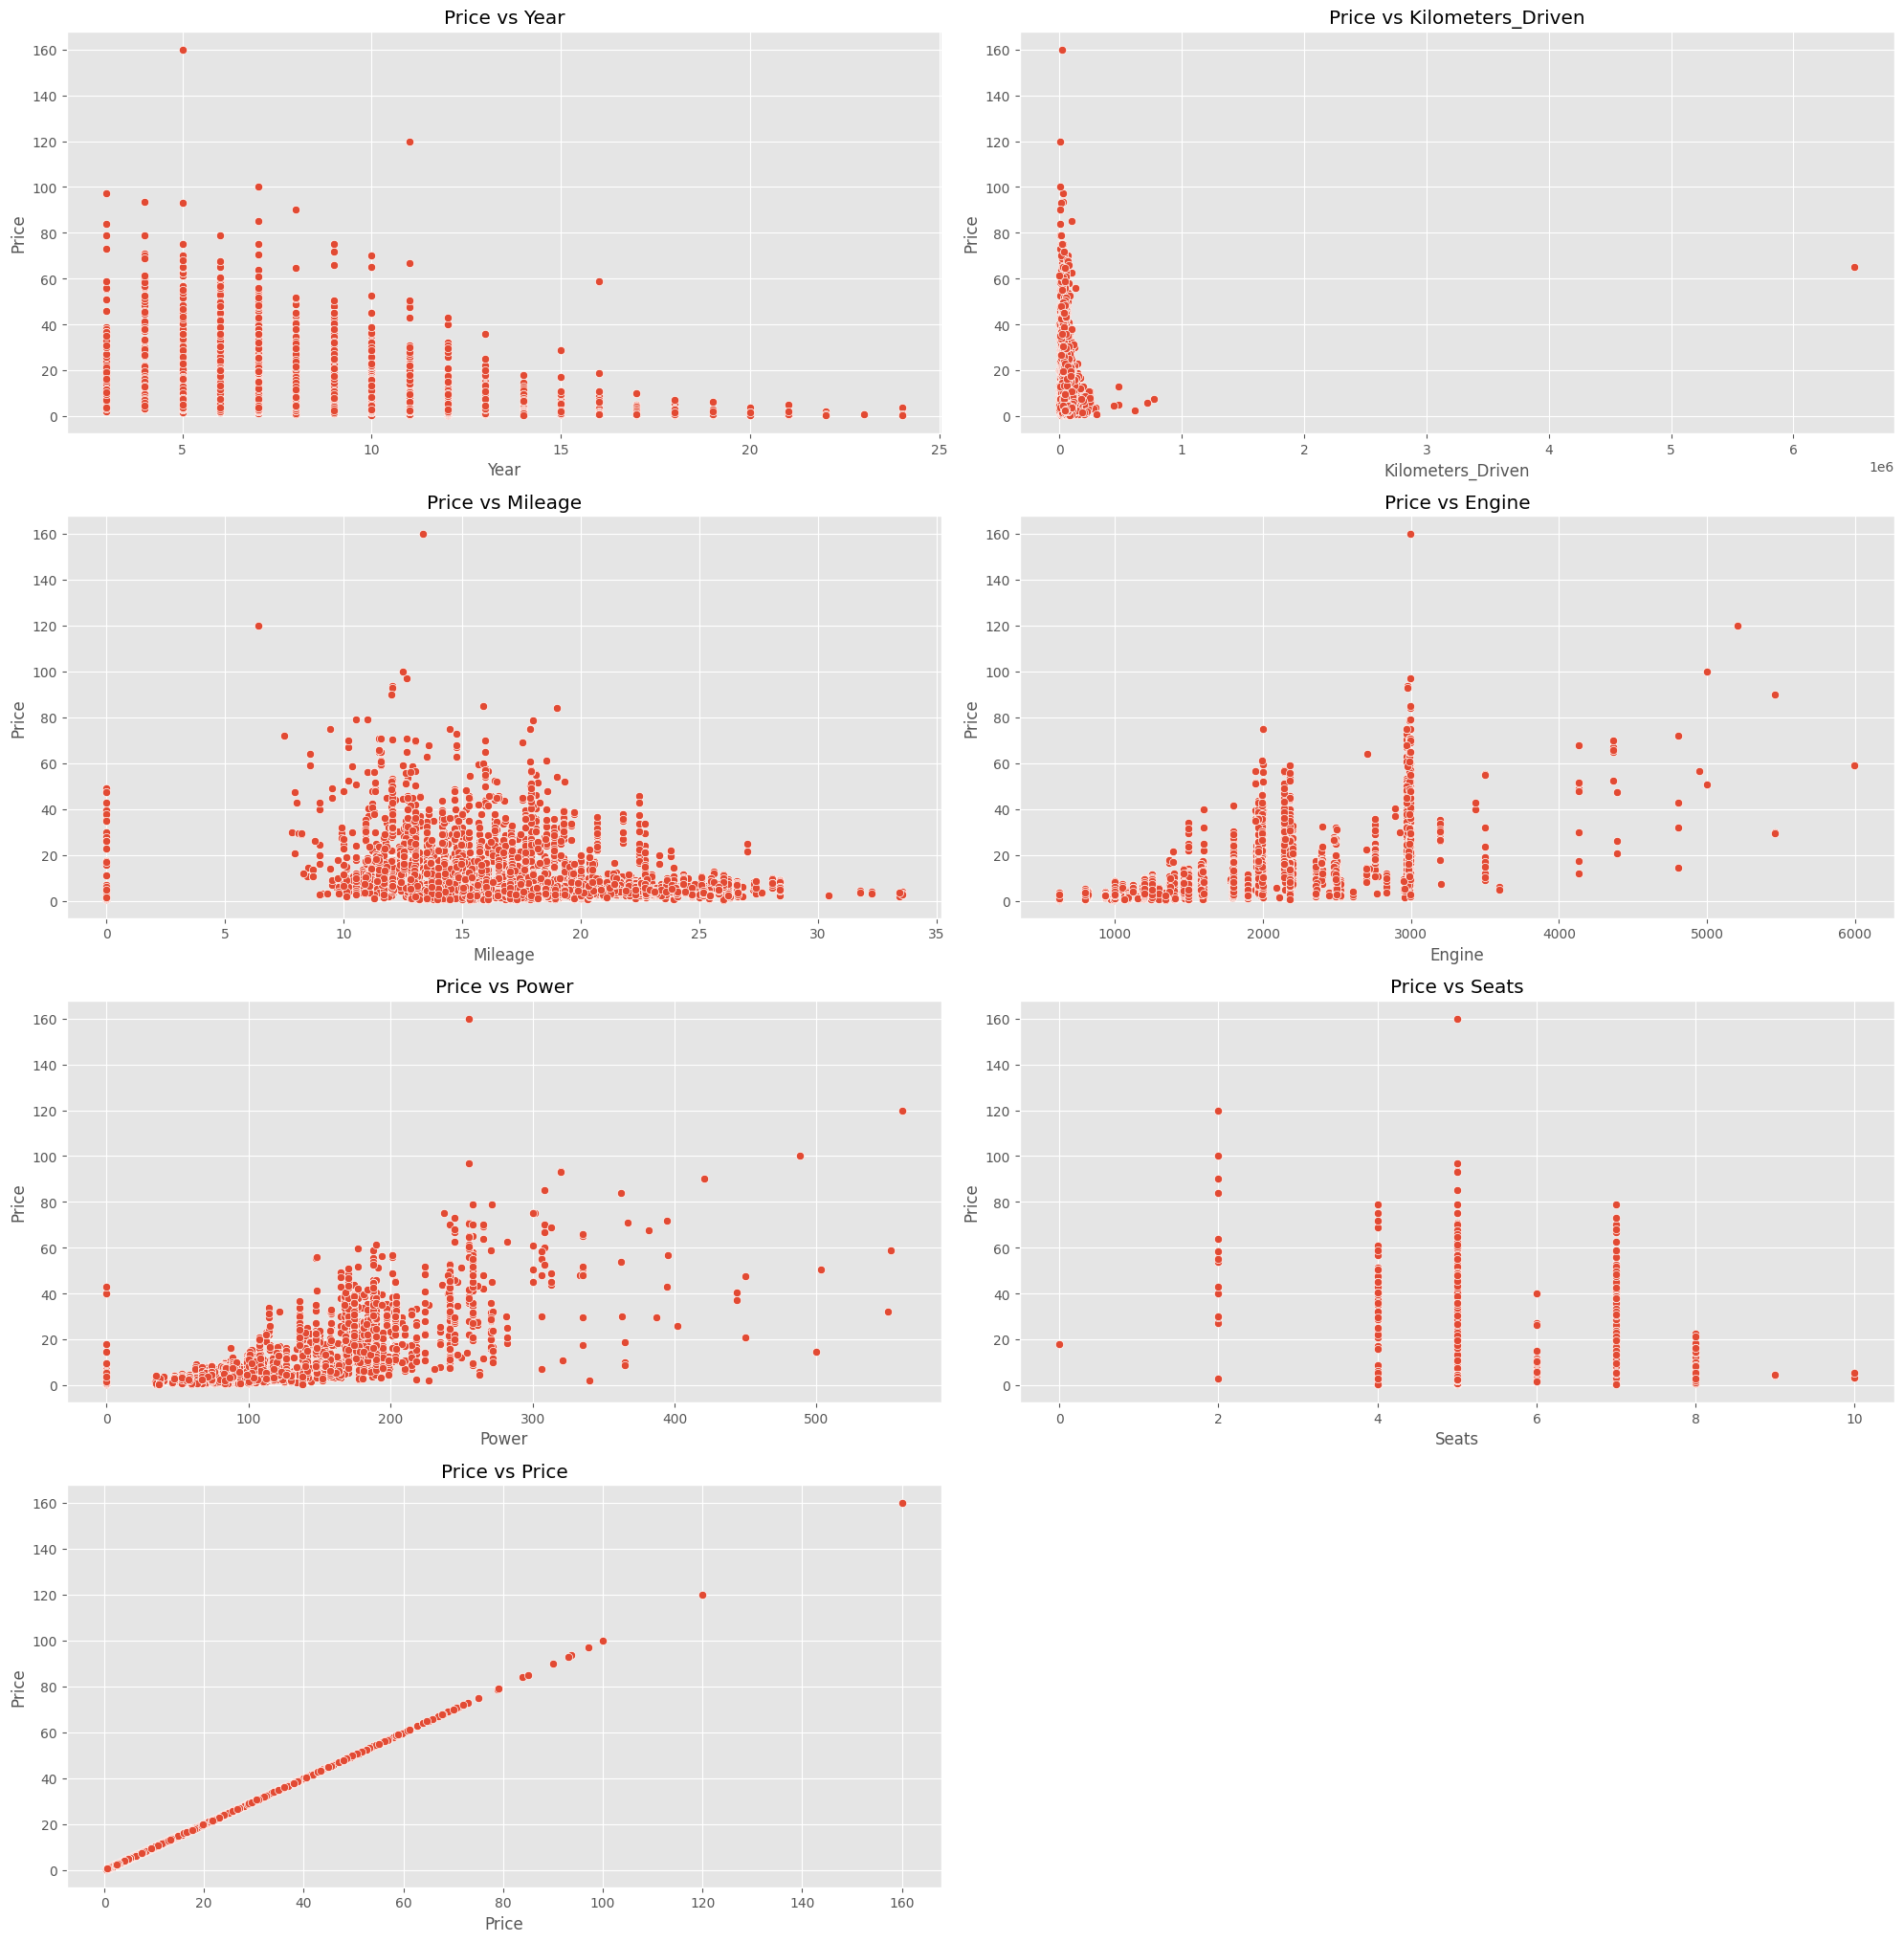

In [298]:
numeric_columns= numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,25))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,2,i+1)
                     sns.scatterplot(x=df[variable],y=df['Price']).set(title='Price vs '+ variable)
                     plt.tight_layout()

75 % cars available for sell have auto Transmission.
35 % cars are First owned cars.


# **Model Training**

creating the numerical and categorical features list

In [299]:
num_features = df.drop(['Price'], axis=1).select_dtypes(include=np.number).columns
cat_features = df.drop('Price', axis=1).select_dtypes(include=['object']).columns

dropping the target to prepare the training data with the features

In [300]:
X = df.drop(['Price'], axis=1)
y = np.log(df['Price'].values)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Building the pipeline.

In [301]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()) ])

categorical_transformer = Pipeline(steps=[
    ('one_hot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)
    ])

Fitting linear regression method

In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   float64
 8   Engine             5975 non-null   float64
 9   Power              5975 non-null   float64
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 606.8+ KB


In [303]:
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier',  LinearRegression())
])

model_lin = pipe.fit(X_train, y_train)
y_pred_train = model_lin.predict(X_train)
y_pred_test = model_lin.predict(X_test)
print('Training set score: '+ str(model_lin.score(X_train, y_train)))
print('Test set score: '+ str(model_lin.score(X_test, y_test)))

Training set score: 0.9829052033495931
Test set score: 0.8691323871314705


In [304]:
rmse_train = np.sqrt(mean_squared_error(np.exp(y_train),np.exp(y_pred_train)))
print(f'Root Mean Square Error Linear Regression: {rmse_train}')

Root Mean Square Error Linear Regression: 1.5277380892589278


In [305]:
rmse_test = np.sqrt(mean_squared_error(np.exp(y_test),np.exp(y_pred_test)))
print(f'Root Mean Square Error Linear Regression: {rmse_test}')

Root Mean Square Error Linear Regression: 5.898893437606395


The R squared and RMSE in test has a wider gap that the one in training which means that the model is not capturing the model parameters correctly for various features or trying to overfit the data.

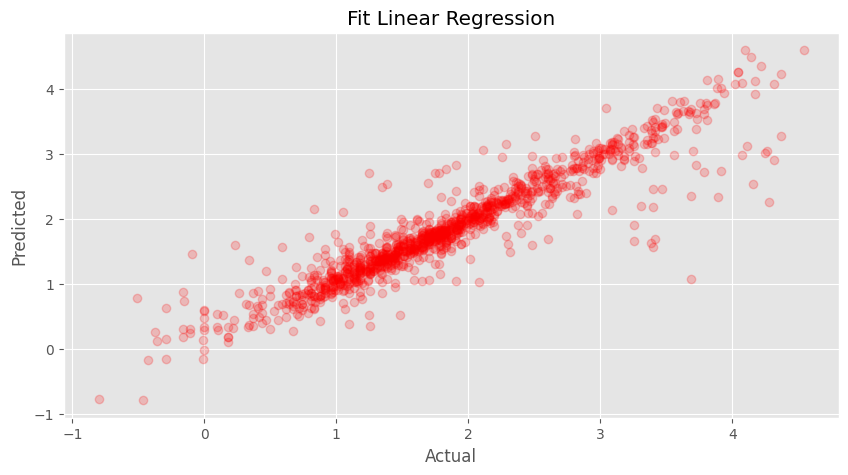

In [306]:
plt.figure(figsize=(10,5))
plt.plot(y_test, y_pred_test,'ro',alpha=0.2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Fit Linear Regression')
plt.show()

RANDOM FOREST

In [307]:
pipe_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier',   RandomForestRegressor())
])

model_rf = pipe_rf.fit(X_train, y_train)

y_pred_rf_train = model_rf.predict(X_train)
y_pred_rf_test = model_rf.predict(X_test)

print('Training set score: ' + str(model_rf.score(X_train, y_train)))
print('Test set score: ' + str(model_rf.score(X_test, y_test)))

Training set score: 0.9906490336895164
Test set score: 0.9404947329532196


In [308]:
rmse_rf_train = np.sqrt(mean_squared_error(np.exp(y_train),np.exp(y_pred_rf_train)))
print(f'Root Mean Square Error RF Model for train data: {rmse_rf_train}')

Root Mean Square Error RF Model for train data: 1.6450699722691944


In [309]:
rmse_rf_test = np.sqrt(mean_squared_error(np.exp(y_test),np.exp(y_pred_rf_test)))
print(f'Root Mean Square Error Random Forest: {rmse_rf_test}')

Root Mean Square Error Random Forest: 3.3618970400038206


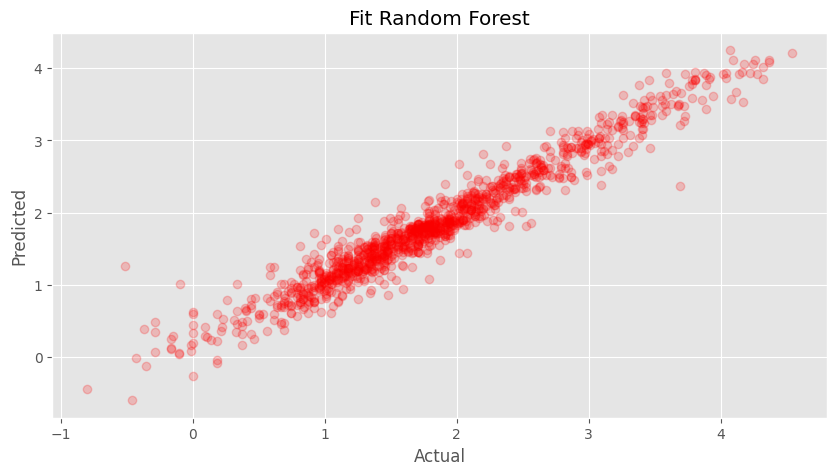

In [310]:
plt.figure(figsize=(10,5))
plt.plot(y_test, y_pred_rf_test,'ro',alpha=0.2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Fit Random Forest')
plt.show()

# Gradient Boosting

In [311]:
gbr_params = {'n_estimators': 1000,
          'max_depth': 3,
          'learning_rate': 0.1,
          'loss': 'squared_error'}

pipe_gb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier',   GradientBoostingRegressor(**gbr_params))
])

model_gb = pipe_gb.fit(X_train, y_train)

y_pred_gb_train = model_gb.predict(X_train)
y_pred_gb_test = model_gb.predict(X_test)


print('Training set score: ' + str(model_gb.score(X_train, y_train)))
print('Test set score: ' + str(model_gb.score(X_test, y_test)))

Training set score: 0.9698489211630918
Test set score: 0.9382725994030034


In [312]:
rmse_gb_train = np.sqrt(mean_squared_error(np.exp(y_train),np.exp(y_pred_gb_train)))
print(f'Root Mean Square Error GB Model for train data: {rmse_gb_train}')

Root Mean Square Error GB Model for train data: 2.283040895502553


In [313]:
rmse_gb_test = np.sqrt(mean_squared_error(np.exp(y_test),np.exp(y_pred_gb_test)))
print(f'Root Mean Square Error GB Model for test data: {rmse_gb_test}')

Root Mean Square Error GB Model for test data: 3.4792642853448488


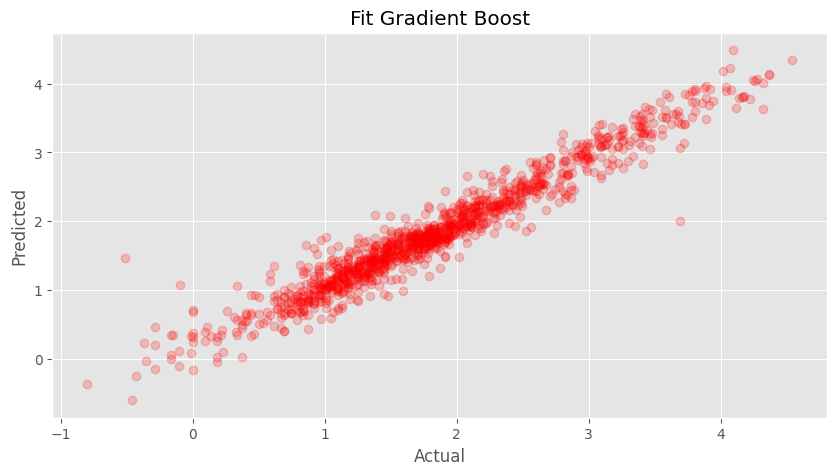

In [314]:
plt.figure(figsize=(10,5))
plt.plot(y_test, y_pred_gb_test,'ro',alpha=0.2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Fit Gradient Boost')
plt.show()

In [315]:
from xgboost import XGBRegressor
model_xg = XGBRegressor()

In [316]:
params_xg_test = {'n_estimators': 1000,
          'max_depth': 6,
          'learning_rate': 0.1,
          'loss': 'squared_error'}

In [317]:
pipe_xg_test = pipe_gb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor',   XGBRegressor(**params_xg_test))
])

In [318]:
model_xg = pipe_xg_test.fit(X_train, y_train)

y_pred_xg_train = model_xg.predict(X_train)
y_pred_xg_test = model_xg.predict(X_test)


print('Training set score: ' + str(model_xg.score(X_train, y_train)))
print('Test set score: ' + str(model_xg.score(X_test, y_test)))

[12:49:58] WARNING: ../src/learner.cc:767: 
Parameters: { "loss" } are not used.

Training set score: 0.9862030883387962
Test set score: 0.9524050929249366


In [319]:
rmse_xg_train = np.sqrt(mean_squared_error(np.exp(y_train),np.exp(y_pred_xg_train)))
print(f'Root Mean Square Error XGB-Train: {rmse_xg_train}')

Root Mean Square Error XGB-Train: 1.4621290544026277


In [320]:
rmse_xg_test = np.sqrt(mean_squared_error(np.exp(y_test),np.exp(y_pred_xg_test)))
print(f'Root Mean Square Error XGB-Test: {rmse_xg_test}')

Root Mean Square Error XGB-Test: 3.2112748791292907


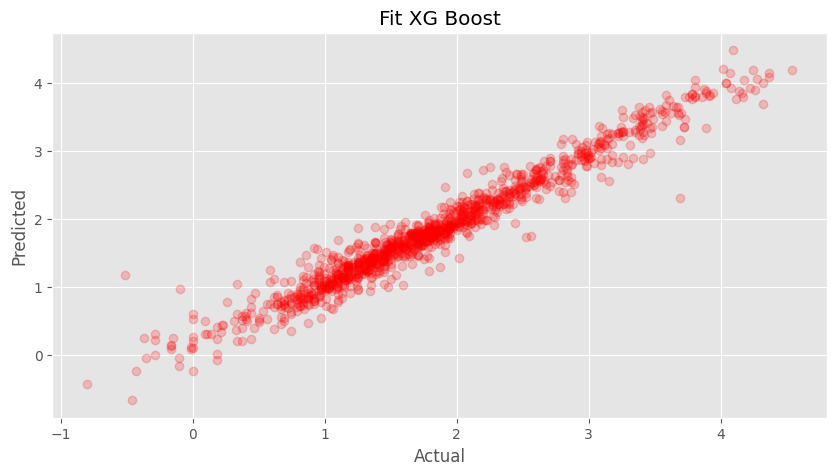

In [321]:
plt.figure(figsize=(10,5))
plt.plot(y_test, y_pred_xg_test,'ro',alpha=0.2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Fit XG Boost')
plt.show()

# Predicition using XGB trained model

In [322]:
predicted_price_lr = pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Hyundai Elite i20 Magna Plus','Kochi',11,23955,
                                                                'Petrol','Manual','First',18.6,1197,81.86,5]).reshape(1,11))) 

In [323]:
predicted_price_rf = pipe_rf.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Hyundai Elite i20 Magna Plus','Kochi',11,23955,
                                                                'Petrol','Manual','First',18.6,1197,81.86,5]).reshape(1,11))) 

In [324]:
predicted_price_gb = pipe_gb.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Hyundai Elite i20 Magna Plus','Kochi',11,23955,
                                                                'Petrol','Manual','First',18.6,1197,81.86,5]).reshape(1,11))) 

In [325]:
predicted_price = pipe_xg_test.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Hyundai Elite i20 Magna Plus','Kochi',11,23955,
                                                                'Petrol','Manual','First',18.6,1197,81.86,5]).reshape(1,11)))  

In [326]:
print(f'The predicted car value for the test data taken: {np.exp(predicted_price_lr).astype(int)} lakhs')
print(f'The predicted car value for the test data taken: {np.exp(predicted_price_rf).astype(int)} lakhs')
print(f'The predicted car value for the test data taken: {np.exp(predicted_price_gb).astype(int)} lakhs')
print(f'The predicted car value for the test data taken: {np.exp(predicted_price).astype(int)} lakhs')

The predicted car value for the test data taken: [3] lakhs
The predicted car value for the test data taken: [3] lakhs
The predicted car value for the test data taken: [3] lakhs
The predicted car value for the test data taken: [3] lakhs
